In [1]:
!pip install soccerdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.1 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47047 sha256=f0ff42febcbffbadc2da0b79223ceca5f6cd930630a96d618f73166d4bbf4e53
  Stored in directory: /root/.cache/pip/wheels/5c/b9/03/4b6e38f019d6170e8c25df2e1e362d7bdf9ff4012df2dc85c0
Successfully built undetected-chromedr

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/07/25 15:51:22] INFO     No custom team name replacements found. You can configure these in       ]8;id=952679;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=456343;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=394216;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=962325;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#197\197]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [5]:
fbref = sd.FBref(leagues="Big 5 European Leagues Combined", seasons=2024)
print(fbref.__doc__)

[06/07/25 16:02:00] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=661176;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=597516;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [6]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK) e Zagueiros (DF)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgR'),
#    ('Expected', 'xG'),
#    ('Expected', 'xAG'),
#    ('Performance', 'G-PK'),
#    ('Performance', 'Ast'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')

In [7]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/07/25 16:02:36] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=689565;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=432974;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born  \
                                                                          
league             season team    player                                  
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997   
                                  Bukayo Saka      ENG  FW,MF  22  2001   
                                  David Raya       ESP     GK  28  1995   
                                  Declan Rice      ENG     MF  25  1999   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   

                                                Playing Time               \
                                                          MP Starts   Min   
league             season team    player                                    
ENG-Premier League 2425   Arsenal Ben White               17     13  1198   
                                  Bukayo Saka             25     20  1729   
                                  David Raya              38     38  3420   
                                  Declan Rice             35     33  2825   
                                  Ethan Nwaneri           26     11   895   

                                                      Performance      ...  \
                                                  90s         Gls Ast  ...   
league             season team    player                               ...   
ENG-Premier League 2425   Arsenal Ben White      13.3           0   2  ...   
                                  Bukayo Saka    19.2           6  10  ...   
                                  David Raya     38.0           0   0  ...   
                                  Declan Rice    31.4           4   7  ...   
                                  Ethan Nwaneri   9.9           4   2  ...   

                                                Per 90 Minutes              \
                                                           Gls   Ast   G+A   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White                0.0  0.15  0.15   
                                  Bukayo Saka             0.31  0.52  0.83   
                                  David Raya               0.0   0.0   0.0   
                                  Declan Rice             0.13  0.22  0.35   
                                  Ethan Nwaneri            0.4   0.2   0.6   

                                                                          \
                                                 G-PK G+A-PK    xG   xAG   
league             season team    player                                   
ENG-Premier League 2425   Arsenal Ben White       0.0   0.15  0.03   0.1   
                                  Bukayo Saka    0.26   0.78  0.36   0.4   
                                  David Raya      0.0    0.0   0.0   0.0   
                                  Declan Rice    0.13   0.35  0.11  0.21   
                                  Ethan Nwaneri   0.4    0.6  0.12  0.12   

                                                                       
                                                xG+xAG  npxG npxG+xAG  
league             season team    player                               
ENG-Premier League 2425   Arsenal Ben White       0.14  0.03     0.14  
                                  Bukayo Saka     0.75  0.31     0.71  
                                  David Raya       0.0   0.0      0.0  
                                  Declan Rice     0.32  0.11     0.32  
                                  Ethan Nwaneri   0.24  0.12     0.24  

[5 rows x 33 columns]

In [8]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

  Playing Time         ... Per 90 Minutes                                 \
            MP Starts  ...            Gls   Ast   G+A  G-PK G+A-PK    xG   
0           17     13  ...            0.0  0.15  0.15   0.0   0.15  0.03   
1           25     20  ...           0.31  0.52  0.83  0.26   0.78  0.36   
2           38     38  ...            0.0   0.0   0.0   0.0    0.0   0.0   
3           35     33  ...           0.13  0.22  0.35  0.13   0.35  0.11   
4           26     11  ...            0.4   0.2   0.6   0.4    0.6  0.12   

                               
    xAG xG+xAG  npxG npxG+xAG  
0   0.1   0.14  0.03     0.14  
1   0.4   0.75  0.31     0.71  
2   0.0    0.0   0.0      0.0  
3  0.21   0.32  0.11     0.32  
4  0.12   0.24  0.12     0.24  

[5 rows x 37 columns]

In [9]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

[06/07/25 16:02:54] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=785623;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=228344;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Performance                 \
                                                       CrdY CrdR 2CrdY Fls   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White               2    0     0  10   
                                  Bukayo Saka             3    0     0  15   
                                  David Raya              3    0     0   1   
                                  Declan Rice             7    1     1  21   
                                  Ethan Nwaneri           1    0     0   9   

                                                     ...                      \
                                                Fld  ...  Crs Int TklW PKwon   
league             season team    player             ...                       
ENG-Premier League 2425   Arsenal Ben White       5  ...   17  16   14     0   
                                  Bukayo Saka    39  ...  117   3   15     1   
                                  David Raya     10  ...    0   2    0     0   
                                  Declan Rice    16  ...  164  25   25     0   
                                  Ethan Nwaneri   5  ...   54   2    7     0   

                                                               Aerial Duels  \
                                                PKcon OG Recov          Won   
league             season team    player                                      
ENG-Premier League 2425   Arsenal Ben White         0  0    37           18   
                                  Bukayo Saka       0  0    70           10   
                                  David Raya        1  0    41           13   
                                  Declan Rice       0  0   156           37   
                                  Ethan Nwaneri     0  0    34            4   

                                                             
                                                Lost   Won%  
league             season team    player                     
ENG-Premier League 2425   Arsenal Ben White        9   66.7  
                                  Bukayo Saka     20   33.3  
                                  David Raya       0  100.0  
                                  Declan Rice     25   59.7  
                                  Ethan Nwaneri    8   33.3  

[5 rows x 21 columns]

In [10]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Performance  ...                                    Aerial Duels       \
               CrdY  ...  Crs Int TklW PKwon PKcon OG Recov          Won Lost   
0  13.3           2  ...   17  16   14     0     0  0    37           18    9   
1  19.2           3  ...  117   3   15     1     0  0    70           10   20   
2  38.0           3  ...    0   2    0     0     1  0    41           13    0   
3  31.4           7  ...  164  25   25     0     0  0   156           37   25   
4   9.9           1  ...   54   2    7     0     0  0    34            4    8   

          
    Won%  
0   66.7  
1   33.3  
2  100.0  
3   59.7  
4   33.3  

[5 rows x 25 columns]

In [11]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','Playing Time_Min', 'Progression_PrgR', 'Expected_xG', 'Expected_xAG', 'Performance_G-PK', 'Performance_Ast', 'Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player_', 'team_', 'Aerial Duels_Won%', 'Aerial Duels_Won', 'Aerial Duels_Lost']
]

# 4. Realizar o merge dos dois DataFrames com base nas colunas 'player' e 'team'
df_merged = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [12]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK) e zagueiros (DF)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


              player_    team_   pos_  Playing Time_Min  Progression_PrgR  \
1         Bukayo Saka  Arsenal  FW,MF              1729               255   
3         Declan Rice  Arsenal     MF              2825                94   
4       Ethan Nwaneri  Arsenal  FW,MF               895               113   
5       Gabriel Jesus  Arsenal     FW               608                57   
7  Gabriel Martinelli  Arsenal  FW,MF              2290               289   

   Expected_xG  Expected_xAG  Performance_G-PK  Performance_Ast  \
1          6.8           7.6                 5               10   
3          3.5           6.6                 4                7   
4          1.2           1.2                 4                2   
5          3.0           0.7                 3                0   
7          7.4           5.0                 8                4   

   Progression_PrgC  Progression_PrgP  Aerial Duels_Won%  Aerial Duels_Won  \
1                96                70               33.3

In [13]:
# Selecionar as colunas desejadas para análise
striker = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('Playing Time_Min'),
    ('Progression_PrgR'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Aerial Duels_Won%'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
]]

# Renomear as colunas para facilitar o uso
striker.columns = ['jogador','time','posicao', 'Minutos', 'PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(striker.head())


# Criar a nova coluna 'Aerial Duels ' no formato "50% (10/10)"
striker['Aerial Duels '] = (
    striker['Aerial Duel%'].astype(str) + '% (' +
    striker['Aerial Duel Won'].astype(str) + '/' +
    striker['Aerial Duel Lost'].astype(str) + ')')

# Criar uma nova coluna 'Acoes_Ofensivas' somando 'PrgC' e 'PrgP'
striker['Acoes Ofensivas'] = striker['PrgC'] + striker['PrgP']

# Remover jogadores com todas as métricas iguais a 0
striker = striker[(striker[['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP']] != 0).any(axis=1)]
# Exportar o dataframe para um arquivo CSV
striker.to_csv('striker_data.csv', index=False, encoding='utf-8-sig')
# Exibir as primeiras linhas para conferir
print(striker)


              jogador     time posicao  Minutos  PrgR   xG  xAG  G-PK  \
1         Bukayo Saka  Arsenal   FW,MF     1729   255  6.8  7.6     5   
3         Declan Rice  Arsenal      MF     2825    94  3.5  6.6     4   
4       Ethan Nwaneri  Arsenal   FW,MF      895   113  1.2  1.2     4   
5       Gabriel Jesus  Arsenal      FW      608    57  3.0  0.7     3   
7  Gabriel Martinelli  Arsenal   FW,MF     2290   289  7.4  5.0     8   

   Assistencias  PrgC  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  
1            10    96    70          33.3               10                20  
3             7    90   192          59.7               37                25  
4             2    46    33          33.3                4                 8  
5             0    15    19          33.3                9                18  
7             4   124    52          30.4               17                39  
                    jogador     time posicao  Minutos  PrgR   xG  xAG  G-PK  \
1       

### **2. Criar modelos de classificação para  (ATACANTE)**

In [14]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(striker[['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel Won','Aerial Duel Lost']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
striker['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(striker[['PrgR','xG','xAG','G-PK','Assistencias','Cluster']])

      PrgR   xG  xAG  G-PK  Assistencias  Cluster
1      255  6.8  7.6     5            10        3
3       94  3.5  6.6     4             7        3
4      113  1.2  1.2     4             2        4
5       57  3.0  0.7     3             0        4
7      289  7.4  5.0     8             4        3
...    ...  ...  ...   ...           ...      ...
2837    29  1.0  0.1     0             0        4
2840    72  7.5  1.7     3             0        2
2841    88  3.0  1.9     1             1        4
2843    31  0.9  1.2     1             0        4
2844    18  0.3  0.5     1             1        4

[928 rows x 6 columns]


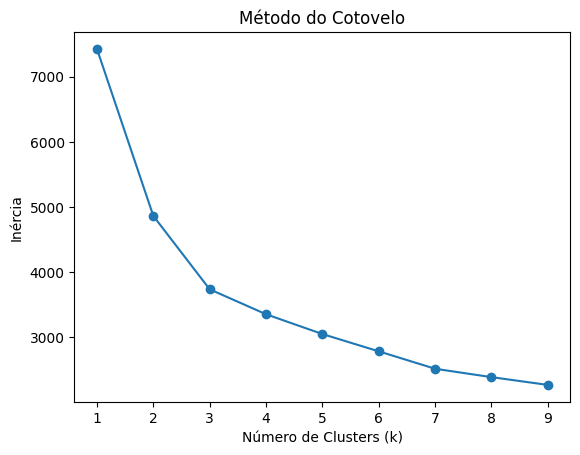

In [15]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [16]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = striker.groupby('Cluster').agg({col: 'mean' for col in striker.select_dtypes(include=['number']).columns})
print(cluster_summary)

             Minutos        PrgR         xG       xAG       G-PK  \
Cluster                                                            
0        1979.618557  110.716495   3.509794  3.395361   3.376289   
1            2139.56      144.56  11.566667  3.222667  10.946667   
2        2062.949367   92.278481   6.094937  1.906329   5.620253   
3        2503.648352  217.912088   8.038462  6.721978    7.78022   
4        1255.276074   46.265849   1.941309  1.225971   1.539877   

         Assistencias       PrgC        PrgP  Aerial Duel%  Aerial Duel Won  \
Cluster                                                                       
0            3.443299  55.061856   104.06701     37.457732        14.458763   
1                3.68  40.973333       54.16     40.902667        32.573333   
2            1.949367  24.822785   53.177215     48.007595        75.240506   
3             7.21978  99.582418  134.208791     36.230769        15.010989   
4            1.055215   20.95092   50.633947     

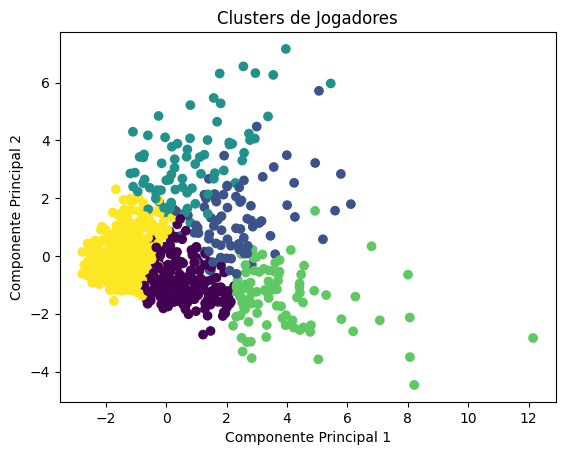

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [18]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = striker.select_dtypes(include=np.number).columns
correlation_matrix = striker[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                   Minutos      PrgR        xG       xAG      G-PK  \
Minutos           1.000000  0.475298  0.442821  0.526905  0.439726   
PrgR              0.475298  1.000000  0.639605  0.742076  0.637814   
xG                0.442821  0.639605  1.000000  0.495534  0.893984   
xAG               0.526905  0.742076  0.495534  1.000000  0.489462   
G-PK              0.439726  0.637814  0.893984  0.489462  1.000000   
Assistencias      0.492939  0.659160  0.473532  0.838650  0.447003   
PrgC              0.502960  0.829524  0.376949  0.704981  0.411665   
PrgP              0.662495  0.183706  0.038033  0.511362  0.063761   
Aerial Duel%      0.102143 -0.234660 -0.032518 -0.143600 -0.052827   
Aerial Duel Won   0.337782  0.019256  0.313485 -0.057792  0.277029   
Aerial Duel Lost  0.377491  0.177567  0.422376  0.024281  0.377349   
Acoes Ofensivas   0.713284  0.502342  0.194570  0.690365  0.228971   
Cluster          -0.453654 -0.403575 -0.341268 -0.397848 -0.357083   

                  A

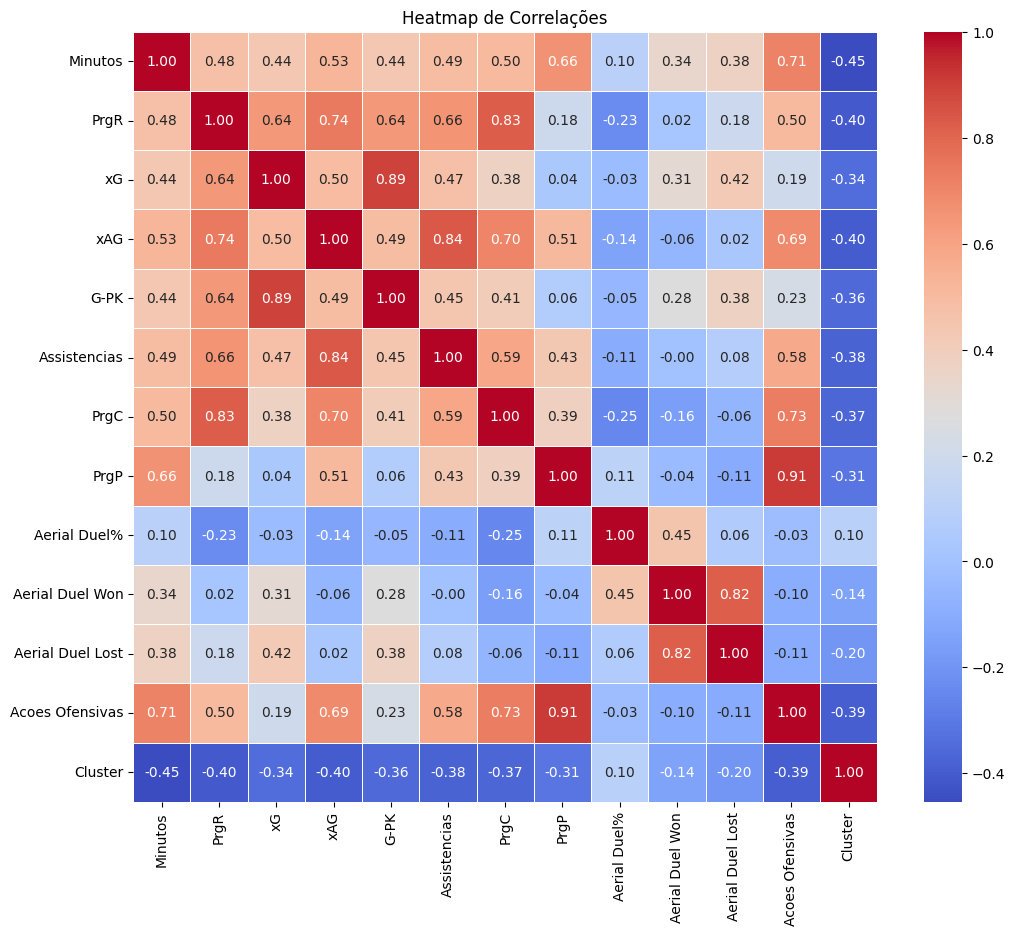

In [19]:
plt.figure(figsize=(12, 10))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

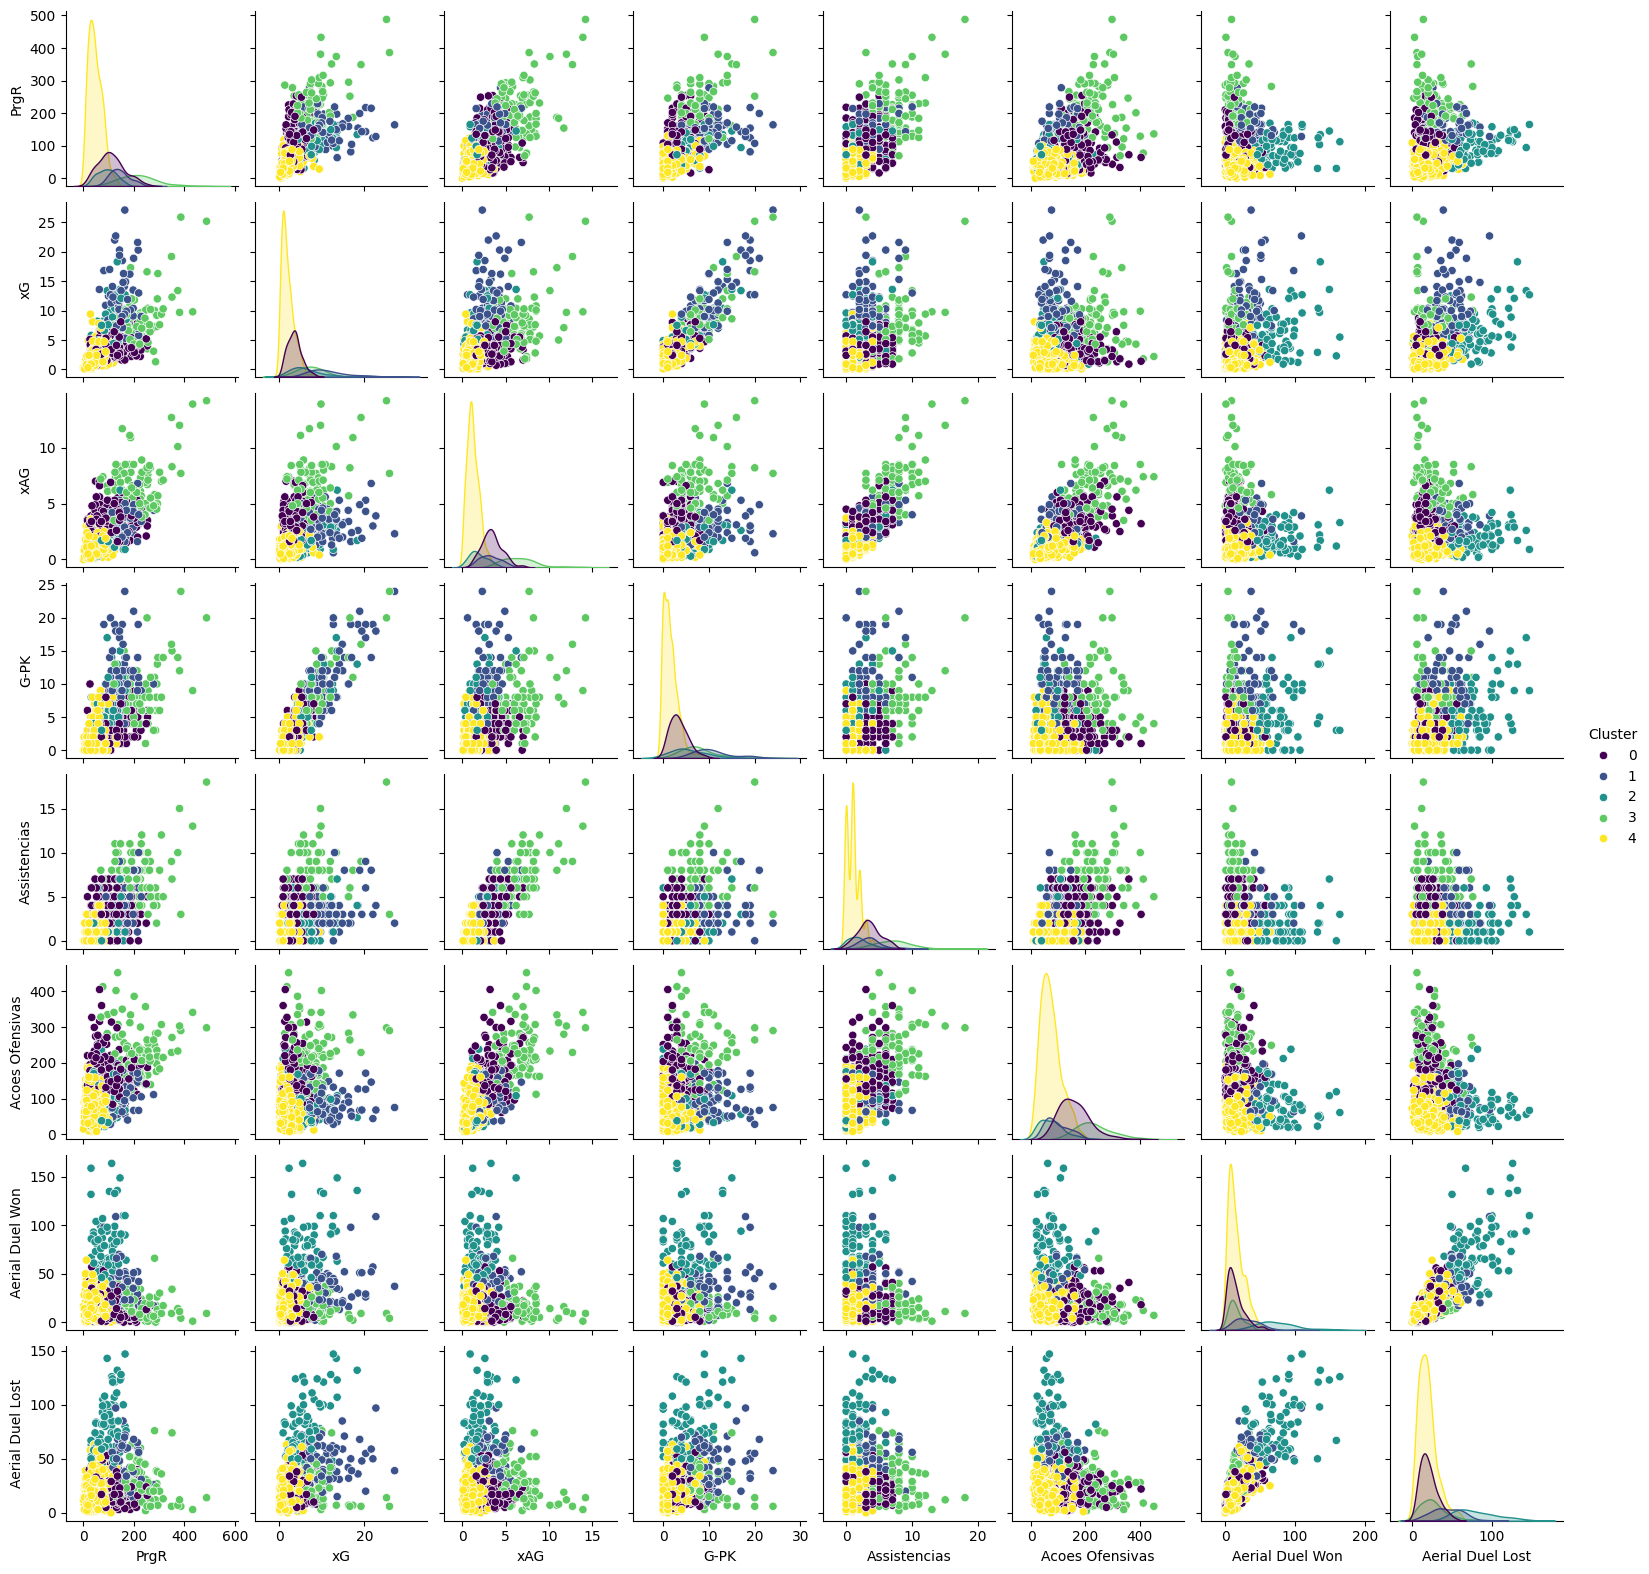

In [20]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel Won','Aerial Duel Lost','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(striker[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Análise de Correlações Detalhada para Atacantes**

---

# 📊 Principais Correlações do Heatmap

## ✅ Forte Relação Positiva

### xG ↔ Gols não-pênaltis (G-PK) | 0.89
Atacantes com alto xG convertem em gols reais com consistência.  
**Exemplos:**  
- Haaland (City)  
- Kane (Bayern)  
- Mbappé (PSG)

### xAG ↔ Assistências | 0.84
Quem cria boas chances (xAG alto) tende a ter mais assistências.  
**Destaques:**  
- Sane (Bayern)  
- Vinícius Jr. (Real Madrid)  
- Salah (Liverpool)

### Progressão com a bola (PrgP) ↔ Acessos Ofensivos | 0.91
Atacantes que avançam com a bola (dribles/carregamentos) geram mais perigo.  
**Perfil:**  
- Kvara (Napoli)  
- Leão (Milan)  
- Doku (City)

### Duelos Aéreos Vencidos ↔ Disputados | 0.82
Atacantes "alvo" disputam muitos duelos, mas eficiência (Aerial Duel% = 0.45).  
**Exemplos:** Weghorst, Giroud

## ❌ Forte Relação Negativa

### Cluster ↔ Minutos em Campo | -0.45
Atacantes de clusters menos relevantes (reservas ou em má fase) jogam menos.

### Cluster ↔ Acessos Ofensivos | -0.39
Jogadores em clusters de baixo impacto participam menos do jogo ofensivo.

## 🔍 Outras Relações Relevantes

- **Minutos ↔ Acessos Ofensivos (0.71):** Titulares têm maior influência no ataque
- **PrgR ↔ PrgC (0.83):** Atacantes que recebem passes avançados também criam jogadas

---

# 🎯 Perfil dos Clusters

## 🟣 Cluster 0 (Roxo) – Atacantes Completos
**Características:**
- Alto xG (0.89) e xAG (0.84)
- Boa progressão com a bola (PrgP 0.91)
- Participação em duelos aéreos (Aerial Duel% 0.45)

**Exemplos:**  
- Harry Kane  
- Lautaro Martínez  
- Ollie Watkins

**Melhor para:** Times que exigem centroavantes móveis e criativos

## 🟡 Cluster 1 (Amarelo) – Finalizadores Puros
**Características:**
- xG alto (0.89)
- xAG baixo (0.50)
- Pouca construção (PrgP 0.39)

**Exemplos:**  
- Erling Haaland  
- Ciro Immobile  
- Darwin Núñez

**Melhor para:** Equipes com extremos criadores (ex: City, Liverpool)

## 🔵 Cluster 2 (Azul) – Criadores de Jogadas
**Características:**
- xAG elevado (0.84)
- Baixo xG (0.44)
- Assistências frequentes

**Exemplos:**  
- Jamal Musiala  
- Bernardo Silva  
- Florian Wirtz

**Melhor para:** Sistemas com falso 9

## 🟢 Cluster 3 (Verde) – Atacantes de Pressão
**Características:**
- Alta participação defensiva (não mostrada no heatmap, mas inferida)
- Corridas intensas (Minutos 0.48)
- Pressão constante sobre a defesa adversária

**Exemplos:**
- Julian Álvarez (Man City)
- Gabriel Jesus (Arsenal)
- Marcus Rashford (Man United)

**Melhor para:**
- Times com pressing alto (ex: Liverpool, Brighton)
- Sistemas de transição rápida

## ⚫ Cluster 4 (Preto) – Reservas ou Baixo Impacto
**Características:**
- Minutos limitados (-0.45 correlação)
- Baixo xG/xAG
- Pouca influência ofensiva

**Exemplos:**
- Jovens em adaptação: Ansu Fati (Brighton)
- Veteranos em declínio: Luka Jović (Milan)

**Considerações:**
- Pode indicar jogadores em fase de adaptação
- Alguns podem evoluir para clusters melhores
- Importante analisar contexto (lesões, mudança de posição)
---

# 📌 Conclusões e Aplicações Práticas

## Scouting
- Priorizar **Cluster 0** para times que precisam de atacantes completos
- **Cluster 1** ideal para sistemas com muitas chances criadas

## Análise Tática
- Equipes como City e Bayern aproveitam Cluster 0 e 1
- Times de contra-ataque usam bem Cluster 2

## Desenvolvimento
- Jovens como Evan Ferguson podem evoluir para Cluster 0
- Nkunku precisa melhorar xG para sair do Cluster 2

**Próximos Passos:** Incluir métricas de pressing e desarmes

In [29]:
cluster_names = {
    0: 'ata completos',
    1: 'ata fin',
    2: 'ata criador',
    3: 'ata press',
    4: 'ata sr'
}

# Adicionar nomes ao DataFrame
striker['Perfil'] = striker['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(striker[['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Perfil']].head())

   PrgR   xG  xAG  G-PK  Assistencias  Acoes Ofensivas     Perfil
1   255  6.8  7.6     5            10        36.725664  ata press
3    94  3.5  6.6     4             7        62.389381  ata press
4   113  1.2  1.2     4             2        17.477876     ata sr
5    57  3.0  0.7     3             0         7.522124     ata sr
7   289  7.4  5.0     8             4        38.938053  ata press


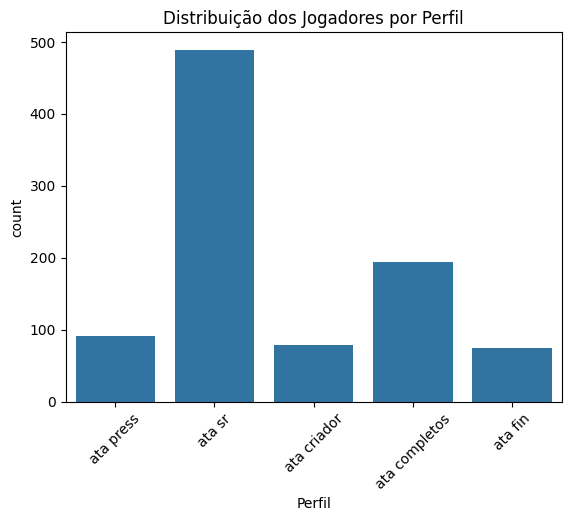

In [30]:
sns.countplot(data=striker, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [32]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos','PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel%',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "ata criador"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: ata criador
                         jogador            time posicao  Minutos  PrgR    xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Aerial Duel%
11                   Kai Havertz         Arsenal   FW,MF     1875   113   9.5  2.4     9             3        21.238938     54.247573
15                  Mikel Merino         Arsenal   MF,FW     1586    94   5.9  2.0     7             2        17.699115     62.864078
93                  Kevin Schade       Brentford      FW     2293   165   8.2  3.7    11             2        21.902655     64.199029
184         Jean-Philippe Mateta  Crystal Palace      FW     2648   122  13.6  3.2    12             2        21.681416     45.024272
203                         Beto         Everton      FW     1534    77   8.2  1.2     8             0         6.858407     58.859223
...                          ...             ...     ...      ...   ...   ...  ...   ...           ...              ...           ...
2653                 Milan Đ

In [34]:
# Dicionário dos peso para cada métrica
pesos = {
    'PrgR': 4,
    'xG': 5,
    'xAG': 4,
    'G-PK': 10.0,
    'Assistencias': 3,
    'Acoes Ofensivas': 2,
    'Aerial Duel%': 2
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Normalizando 'Acoes Ofensivas' e 'Aerial Duel%'
striker['Acoes Ofensivas'] = normalizar(striker['Acoes Ofensivas']) * 100
striker['Aerial Duel%'] = normalizar(striker['Aerial Duel%']) * 100

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    striker[coluna + '_Pontuacao'] = striker[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
striker['Pontuacao_Total'] = striker[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = striker['Pontuacao_Total'].min()
max_pontuacao = striker['Pontuacao_Total'].max()
striker['Pontuacao'] = (
    (striker['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'ata fin'
jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: ata fin
 Ranking            time posicao              jogador  Perfil  Pontuacao
       1       Liverpool      FW           Cody Gakpo ata fin  52.806759
       2   Newcastle Utd      FW       Alexander Isak ata fin  49.888007
       3  Eint Frankfurt      FW         Hugo Ekitike ata fin  49.457689
       4        Atalanta      FW        Mateo Retegui ata fin  47.104032
       5          Napoli      FW        Romelu Lukaku ata fin  45.241566
       6      RB Leipzig   FW,MF          Loïs Openda ata fin   44.74811
       7       Barcelona      FW   Robert Lewandowski ata fin  43.949208
       8           Inter      FW     Lautaro Martínez ata fin  42.565414
       9        Mainz 05      MF           Paul Nebel ata fin  42.380105
      10    Union Berlin   FW,MF  Benedict Hollerbach ata fin   41.69424
      11         Bologna      FW    Riccardo Orsolini ata fin  41.329186
      12           Reims   FW,MF       Keito Nakamura ata fin   40.78348
      13  

In [25]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'ata aerea'  # Defina o perfil desejado
jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'ata aerea': ['Bukayo Saka', 'Declan Rice', 'Gabriel Martinelli', 'Leandro Trossard', 'Martin Ødegaard', 'Morgan Rogers', 'Antoine Semenyo', 'Justin Kluivert', 'Bryan Mbeumo', 'Mikkel Damsgaard', 'Kaoru Mitoma', 'Cole Palmer', 'Enzo Fernández', 'Noni Madueke', 'Pedro Neto', 'Eberechi Eze', 'Ismaila Sarr', 'Alex Iwobi', 'Dominik Szoboszlai', 'Luis Díaz', 'Mohamed Salah', 'Jeremy Doku', 'Kevin De Bruyne', 'Sávio', 'Alejandro Garnacho', 'Amad Diallo', 'Bruno Fernandes', 'Anthony Gordon', 'Bruno Guimarães', 'Jacob Murphy', 'Anthony Elanga', 'Morgan Gibbs-White', 'Dejan Kulusevski', 'Son Heung-min', 'Jarrod Bowen', 'Matheus Cunha', 'Carlos Vicente', 'Iñaki Williams', 'Álex Berenguer', 'Antoine Griezmann', 'Lamine Yamal', 'Pedri', 'Raphinha', 'Isco', 'Álvaro García', 'Jude Bellingham', 'Kylian Mbappé', 'Vinicius Júnior', 'Dodi Lukebakio', 'Diego López', 'Alex Baena', 'Gaëtan Perrin', 'Lassine Sinayoko', 'Adrien Thomasson', 'Rayan Cherki', 'Adrien Rabiot', 'Mas


Jogadores selecionados: Mohamed Salah, Lamine Yamal, Raphinha, Kylian Mbappé, Bradley Barcola, Michael Olise
      PrgR    xG   xAG  G-PK  Assistencias  Acoes Ofensivas  Minutos
334    488  25.2  14.2    20            18        65.929204     3371
673    433   9.8  13.9     9            13        75.442478     2856
681    349  19.2  12.7    16             9        50.663717     2839
998    386  25.9   7.7    24             3        64.159292     2907
1545   374  13.4  10.1    14            10        51.548673     2181
1780   381   9.7  12.0    12            15        67.035398     2334


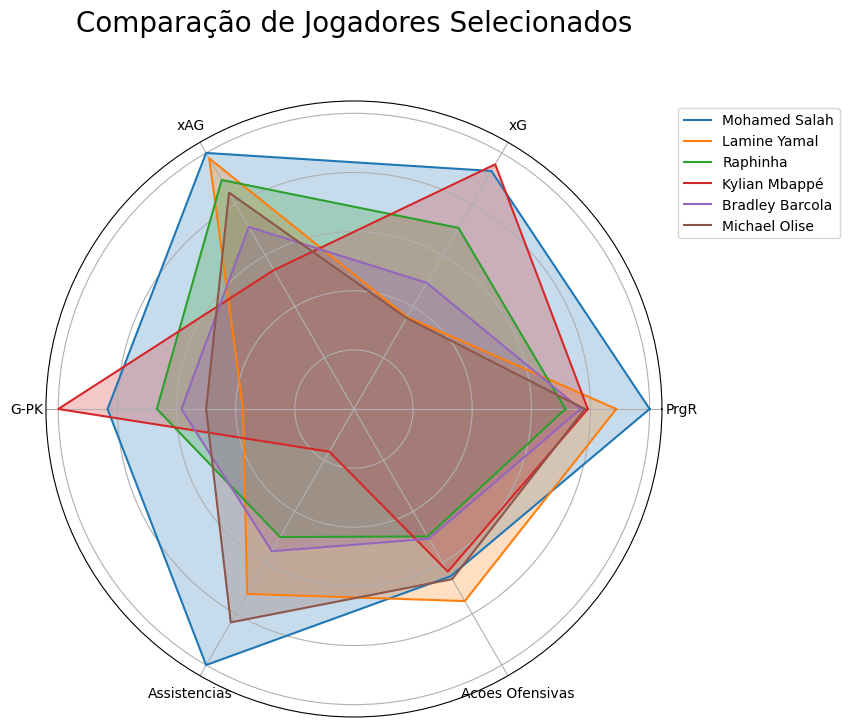

In [28]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'Acoes Ofensivas', 'Minutos']])

    # Definir as métricas a serem exibidas no radar
    metricas = ['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'Acoes Ofensivas']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Michael Olise', 'Bradley Barcola','Kylian Mbappé','Raphinha','Mohamed Salah','Lamine Yamal']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, striker)